
# DESCRIPTION

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person
performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone
(Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration 
and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# importing Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

#BASIC libraries for data handling
import numpy as np
import pandas as pd

#libraries for data visualisation, graph and plots
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for dimension reduction and EDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from collections import Counter

#library to select ML model
from sklearn.model_selection import RandomizedSearchCV

#library to implement ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#libraries to conclude the models with metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from tabulate import tabulate

# Loading Dataset

In [4]:
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [16]:
# to count the number of indiviuals used for the data set 
train.subject.value_counts()


subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

# preProcessing Data


In [8]:
#checking duplicates
print("the number of duplicate values  in train.csv ",sum(train.duplicated()))
print("the number of duplicate values in test.csv ",sum(test.duplicated()))

the number of duplicate values  in train.csv  0
the number of duplicate values in test.csv  0


In [9]:
# checking nan values
print("the number of null values in train.csv ",train.isna().values.sum())
print("the number of null values in train.csv ",test.isna().values.sum())

the number of null values in train.csv  0
the number of null values in train.csv  0


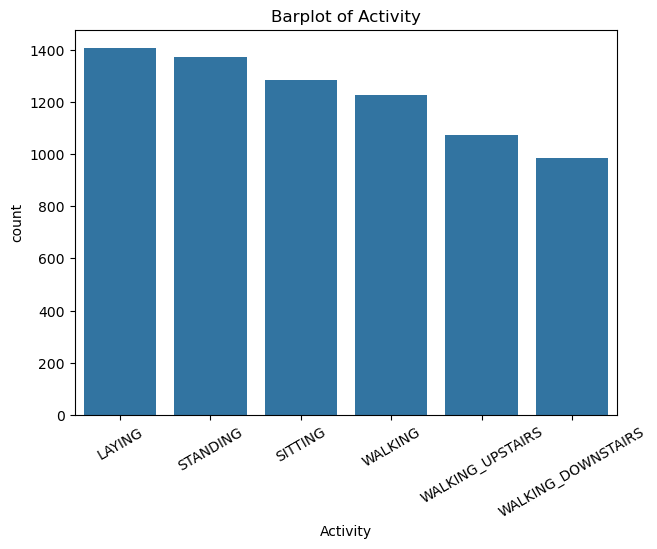

In [10]:
# to check class imbalance
plt.figure(figsize=(7,5))
plt.title('Barplot of Activity')
sns.countplot(x='Activity',data=train, order = train.Activity.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

# Exploratory Data Analysis

In [11]:
train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [12]:
# the data set had many columns with the statistical values of tbodyAcc so to classify it we perform the follwoing
# take a column for instance 
sample_sr= "tBodyAcc-mean()-X"
print(sample_sr.split("-")[0])
# theres another case too...
sample_sr="angle(tBodyAccMean,gravity)"
print(sample_sr.split("-")[0].split('(')[0])

tBodyAcc
angle


In [15]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),
                       orient = "index").rename(columns = {0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


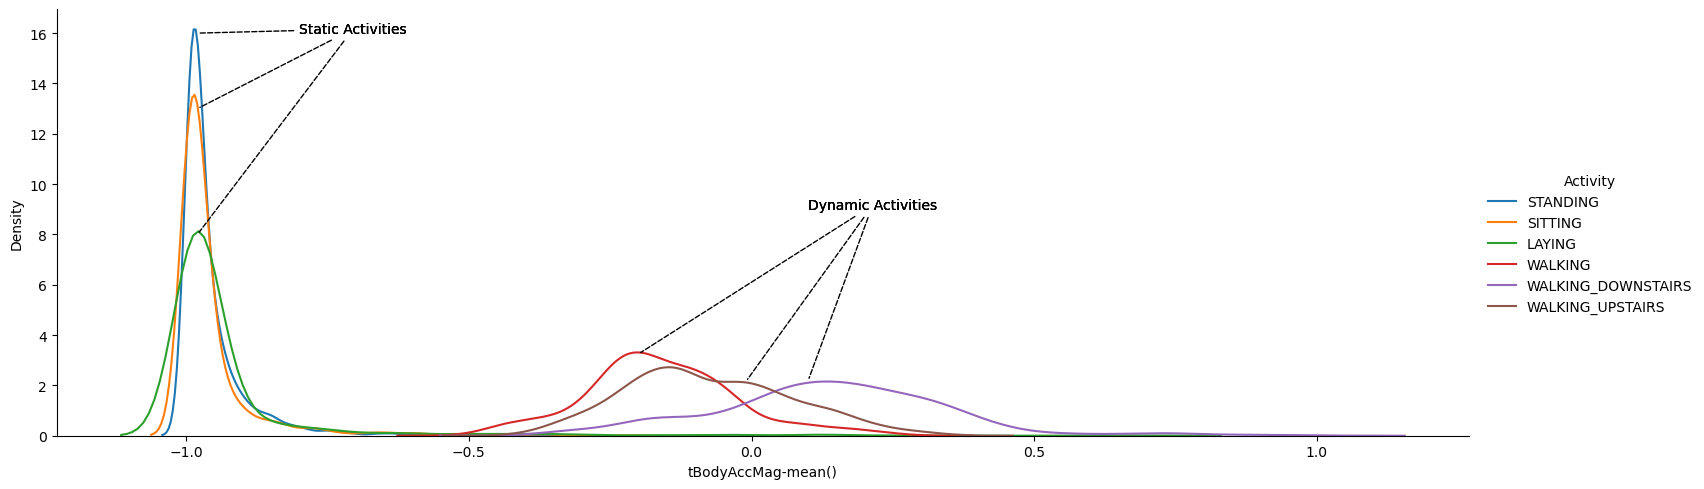

In [176]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

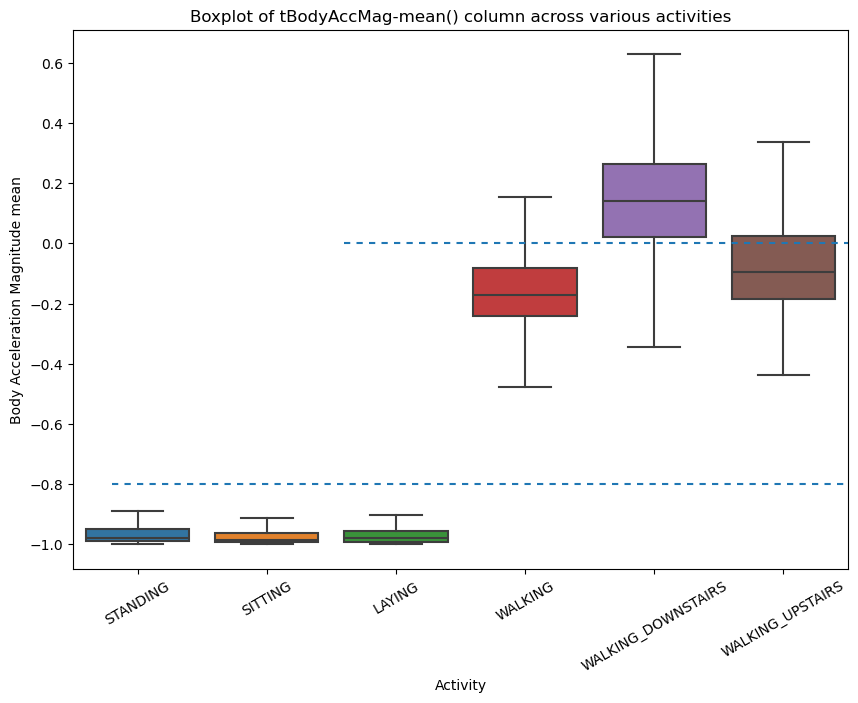

In [177]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.xticks(rotation = 30)
plt.show()

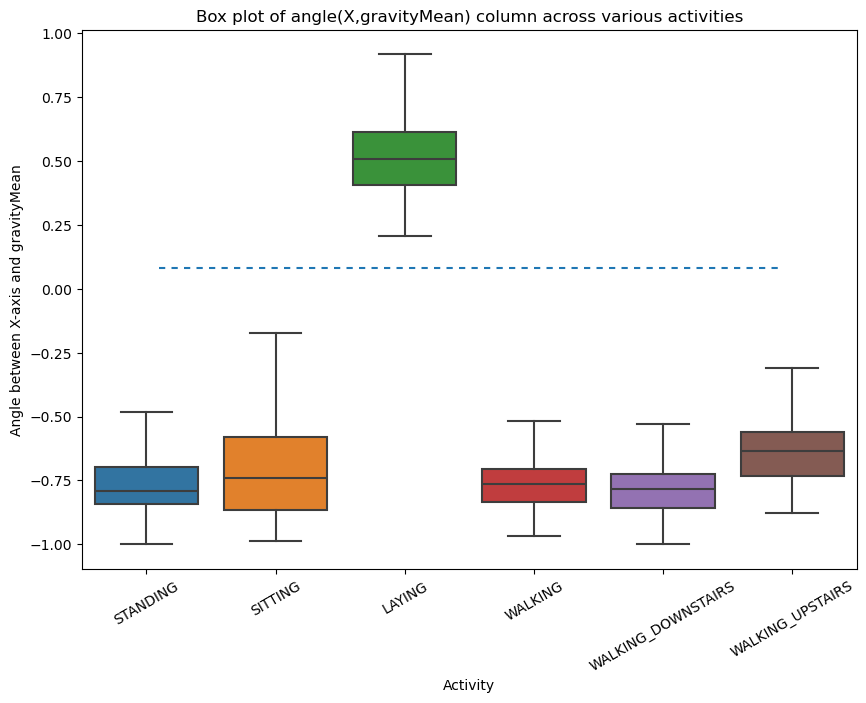

In [178]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

# USING PCA

In [179]:
xpca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(xpca)

In [180]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

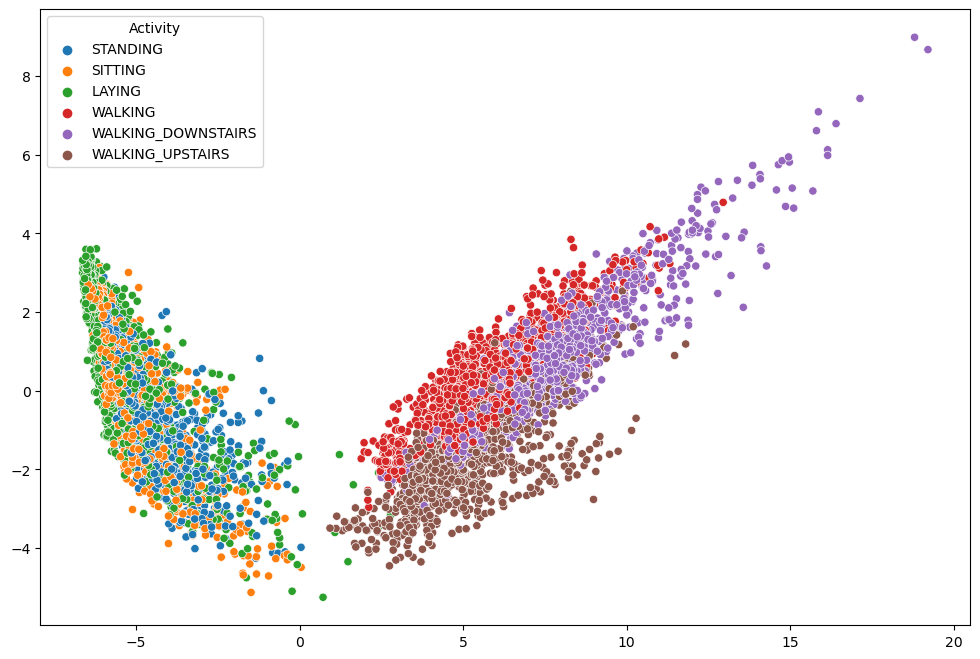

In [181]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

# USING TSNE

In [182]:
xtsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(xtsne)

In [183]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

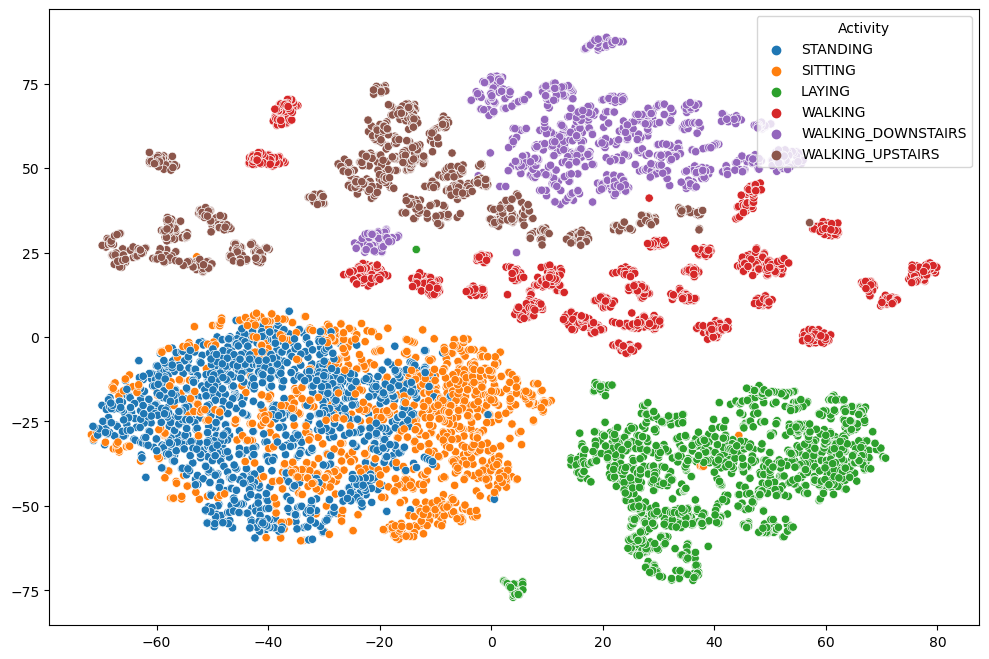

In [184]:
plt.figure(figsize=(12,8))
sns.scatterplot(y = tsne[:, 0], x= tsne[:, 1], hue = train['Activity'])
plt.show()

# Training with linear model

In [185]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

### Most frequent activity 

In [186]:
# Assuming 'Activity' is the target column
if 'Activity' in train.columns:
    # Get the most frequent activity in the dataset
    most_common_activity = train['Activity'].value_counts().idxmax()
    print(f"The person is most likely {most_common_activity}")
else:
    print("The 'Activity' column is not found in the dataset.")

The person is most likely LAYING


## Logistic Regression with Cross Validation

In [187]:
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5,random_state=42)
lr_classifier_rs.fit(X_train, y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [188]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.953953953953954


In [189]:
report = classification_report(y_true=y_test, y_pred=y_pred_lr, target_names=['WALKING','WALKINGUPSTAIRS','WALKINGDOWNSTAIRS', 
                                                                            'SITTING','STANDING','LAYING'])
print(report)

                   precision    recall  f1-score   support

          WALKING       1.00      1.00      1.00       183
  WALKINGUPSTAIRS       0.94      0.86      0.90       170
WALKINGDOWNSTAIRS       0.89      0.94      0.92       178
          SITTING       0.93      1.00      0.96       185
         STANDING       1.00      1.00      1.00       134
           LAYING       0.98      0.91      0.94       149

         accuracy                           0.95       999
        macro avg       0.96      0.95      0.95       999
     weighted avg       0.95      0.95      0.95       999



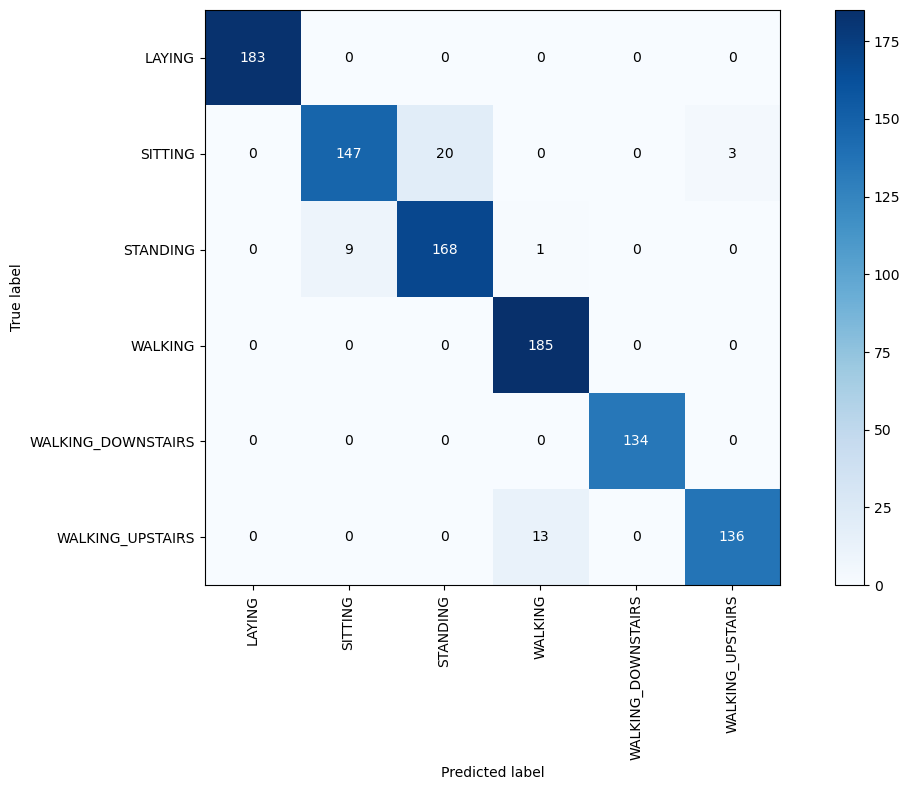

In [190]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [191]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [192]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}
Best score :  0.9371672747957103


## Kernel SVM with cross Validation

In [193]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(X_train, y_train)
y_pred = svm_rs.predict(X_test)


In [194]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.965965965965966


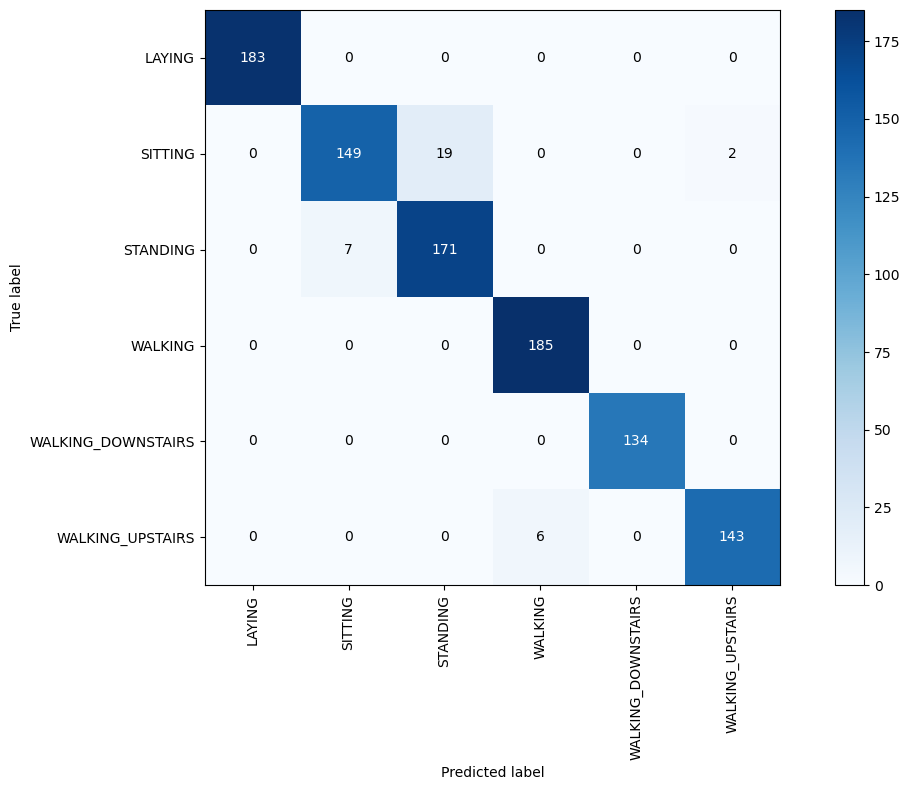

In [195]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [196]:
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=['WALKING','WALKINGUPSTAIRS','WALKINGDOWNSTAIRS', 
                                                                            'SITTING','STANDING','LAYING'])
print(report)

                   precision    recall  f1-score   support

          WALKING       1.00      1.00      1.00       183
  WALKINGUPSTAIRS       0.96      0.88      0.91       170
WALKINGDOWNSTAIRS       0.90      0.96      0.93       178
          SITTING       0.97      1.00      0.98       185
         STANDING       1.00      1.00      1.00       134
           LAYING       0.99      0.96      0.97       149

         accuracy                           0.97       999
        macro avg       0.97      0.97      0.97       999
     weighted avg       0.97      0.97      0.97       999



In [197]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}
Best score :  0.9464109332023303


## Decision Tree with Cross Validation

In [198]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [199]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8548548548548549


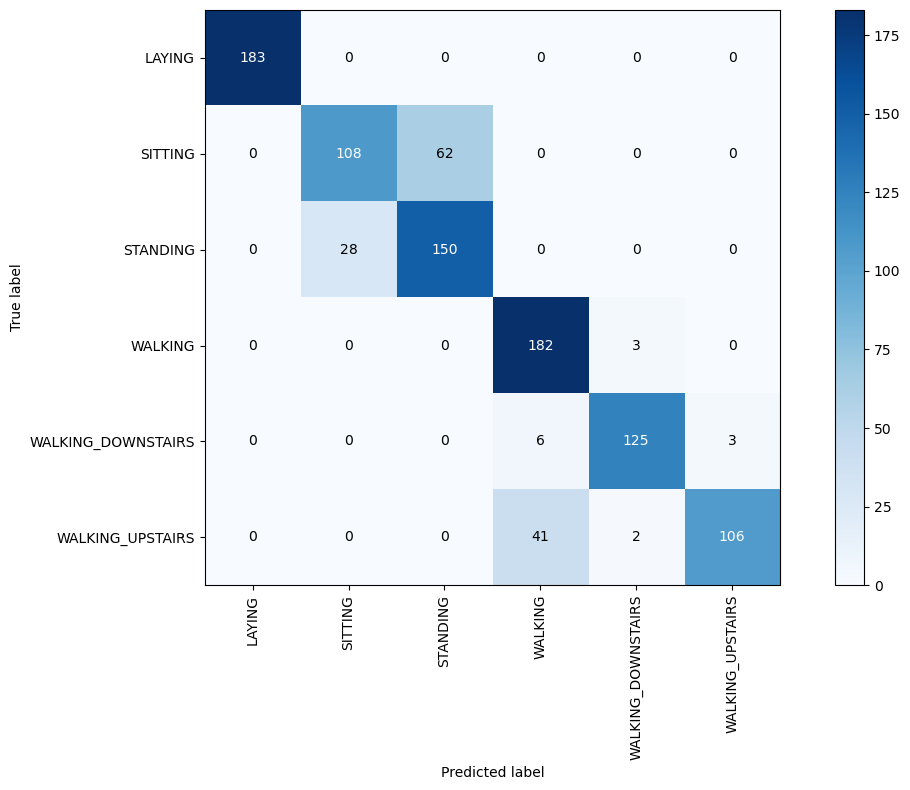

In [200]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [201]:
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=['WALKING','WALKINGUPSTAIRS','WALKINGDOWNSTAIRS', 
                                                                            'SITTING','STANDING','LAYING'])
print(report)

                   precision    recall  f1-score   support

          WALKING       1.00      1.00      1.00       183
  WALKINGUPSTAIRS       0.79      0.64      0.71       170
WALKINGDOWNSTAIRS       0.71      0.84      0.77       178
          SITTING       0.79      0.98      0.88       185
         STANDING       0.96      0.93      0.95       134
           LAYING       0.97      0.71      0.82       149

         accuracy                           0.85       999
        macro avg       0.87      0.85      0.85       999
     weighted avg       0.87      0.85      0.85       999



In [202]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}
Best score :  0.8499795132192917


## Random Forest with Cross Validation 

In [203]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [204]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.914914914914915


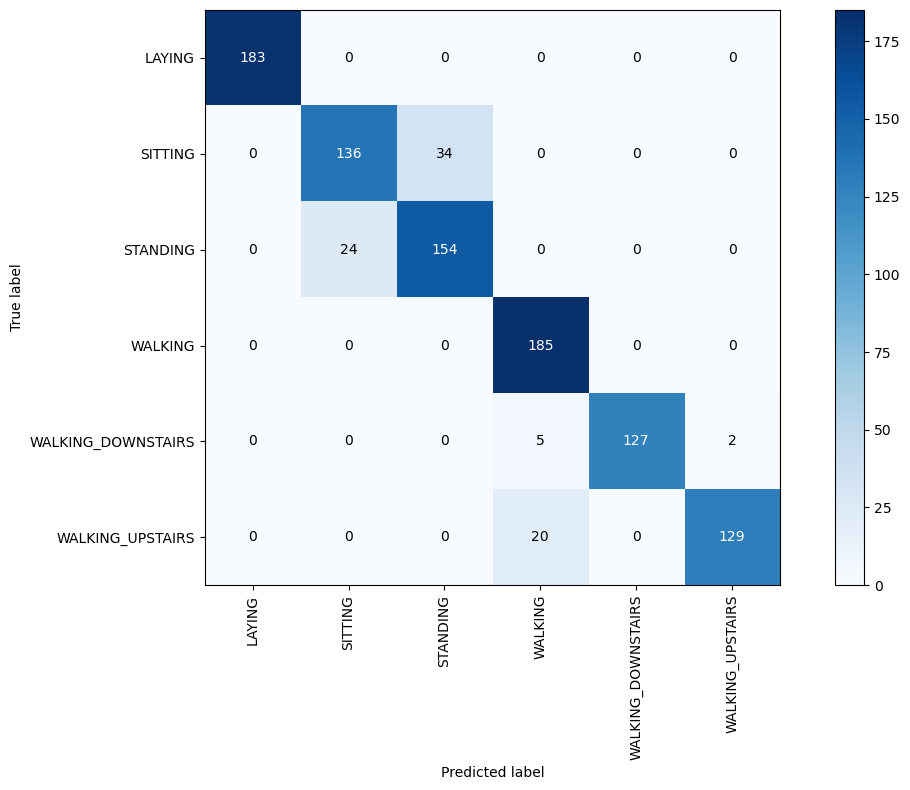

In [205]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [206]:
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=['WALKING','WALKINGUPSTAIRS','WALKINGDOWNSTAIRS', 
                                                                            'SITTING','STANDING','LAYING'])
print(report)

                   precision    recall  f1-score   support

          WALKING       1.00      1.00      1.00       183
  WALKINGUPSTAIRS       0.85      0.80      0.82       170
WALKINGDOWNSTAIRS       0.82      0.87      0.84       178
          SITTING       0.88      1.00      0.94       185
         STANDING       1.00      0.95      0.97       134
           LAYING       0.98      0.87      0.92       149

         accuracy                           0.91       999
        macro avg       0.92      0.91      0.92       999
     weighted avg       0.92      0.91      0.91       999



In [207]:
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=12, n_estimators=70)
Best set of parameters :  {'n_estimators': 70, 'max_depth': 12}
Best score :  0.9207063546016638


In [21]:
def prediction(model, input_data):
    # Ensure input_data is in the correct format for the model
    input_data = input_data.reshape(1, -1)  # Reshape if necessary (e.g., for a single sample)
    
    # Make a prediction
    predicted_activity = model.predict(input_data)[0]  # Get the first predicted activity
    
    return f"The model predicts that the person is currently: {predicted_activity}"


In [22]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "Logistic Regression": LogisticRegression(max_iter=500)  # Increase max_iter for Logistic Regression
}

# Train each model and generate predictions
for model_name, model in models.items():
    print(f"\nTraining and evaluating model: {model_name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Example of predicting on a single sample (optional)
    sample_prediction = model.predict([X_test.iloc[0].values])
    print(f"Sample Prediction for {model_name}: {sample_prediction[0]}")


Training and evaluating model: Decision Tree


NameError: name 'X_train' is not defined

In [219]:
test_input = X_test.iloc[0].values  # Get the first test sample
result = prediction(model, test_input)
print(result)

SyntaxError: invalid syntax (2583202876.py, line 1)